# DCGAN

# 1. Environment Setup
## 1.0. Check GPU

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## 1.1. Install matplotlib

In [2]:
!pip install matplotlib

## 1.2. Install pandas

In [3]:
!pip install pandas

## 1.3. Import

In [4]:
import torch, torchvision, train
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

# Ignore Warning
import warnings
warnings.filterwarnings(action='ignore')

# 2. Data Preprocessing

In [5]:
batch_size = 128

In [6]:
transform = transforms.Compose([transforms.Resize(64), transforms.CenterCrop(64),
                                transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = torchvision.datasets.CelebA('../../../../data/OCR/Jason/celeba/', split='all', download=False, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 3. Train Model

In [7]:
gpu_id = 6
print_freq = 100
epoch_print = 1

epochs = 5

lr = 0.0002
beta1 = 0.5

In [8]:
DCGAN = train.DCGAN(gpu_id=gpu_id, print_freq=print_freq, epoch_print=epoch_print)

In [9]:
DCGAN.train(dataloader, epochs, lr, beta1)

Epoch 1 Started...
Iteration : 100 - G Loss : 5.724912, D Loss : 0.827630
Iteration : 200 - G Loss : 5.906948, D Loss : 1.056918
Iteration : 300 - G Loss : 3.265326, D Loss : 0.717775
Iteration : 400 - G Loss : 2.999667, D Loss : 1.133320
Iteration : 500 - G Loss : 4.624080, D Loss : 1.132475
Iteration : 600 - G Loss : 3.757243, D Loss : 0.788635
Iteration : 700 - G Loss : 2.463654, D Loss : 1.143254
Iteration : 800 - G Loss : 2.682068, D Loss : 0.943031
Iteration : 900 - G Loss : 4.017648, D Loss : 0.996171
Iteration : 1000 - G Loss : 3.753460, D Loss : 1.768581
Iteration : 1100 - G Loss : 2.032090, D Loss : 1.031883
Iteration : 1200 - G Loss : 1.296619, D Loss : 1.017639
Iteration : 1300 - G Loss : 2.813054, D Loss : 1.032821
Iteration : 1400 - G Loss : 3.484157, D Loss : 1.032251
Iteration : 1500 - G Loss : 3.843462, D Loss : 1.700325
Epoch 2 Started...
Iteration : 100 - G Loss : 1.978045, D Loss : 0.741712
Iteration : 200 - G Loss : 2.591757, D Loss : 0.754535
Iteration : 300 - G L

Text(0, 0.5, 'Loss')

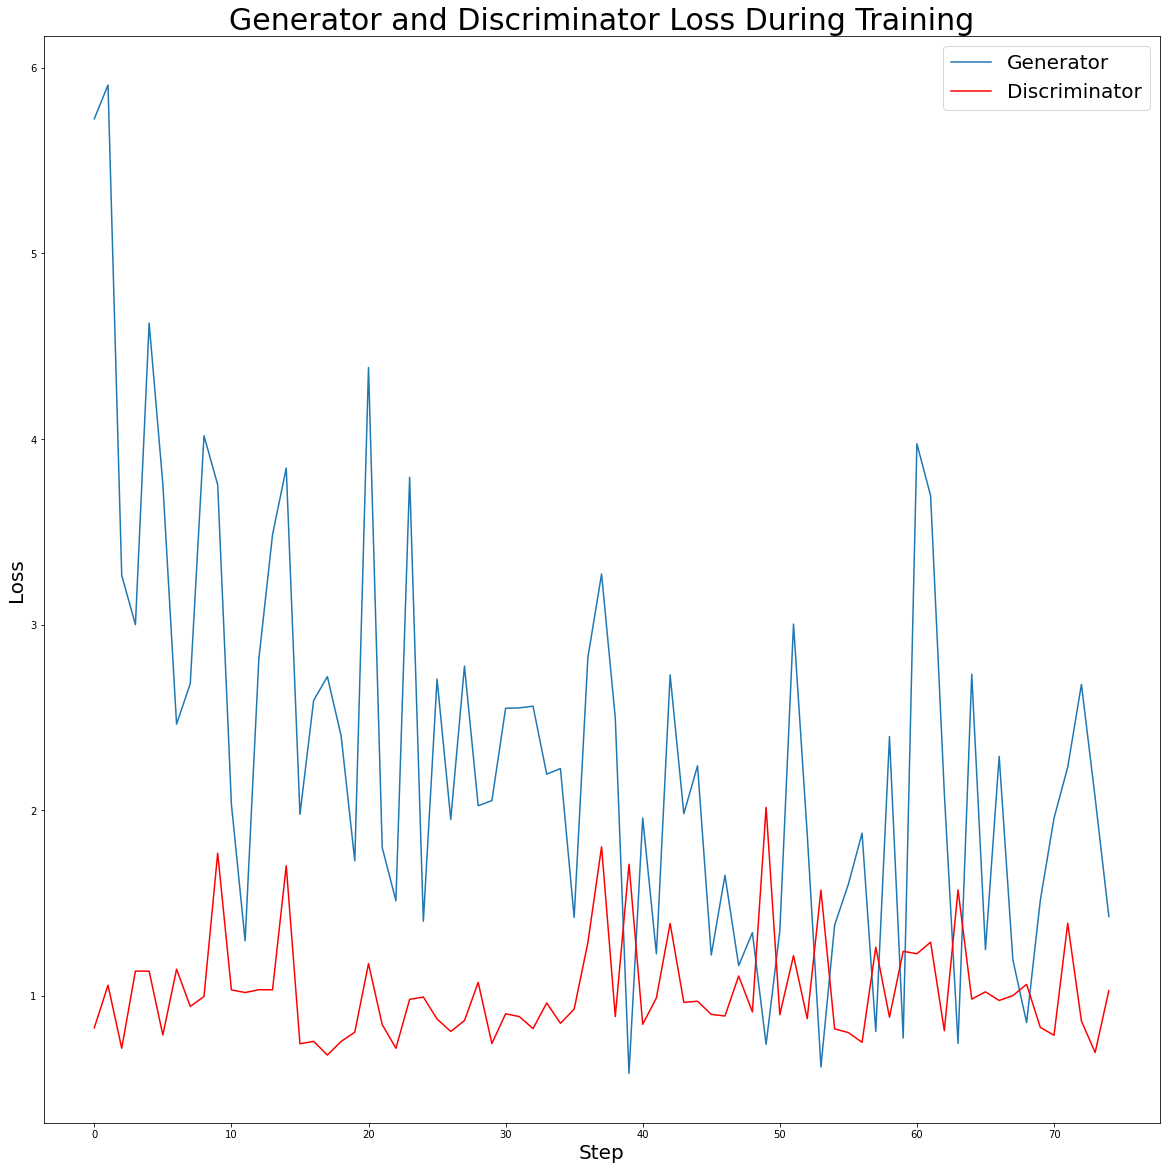

In [10]:
plt.figure(figsize=(20, 20))

G, = plt.plot(DCGAN.train_G_losses, label='Generator')
D, = plt.plot(DCGAN.train_D_losses, color='red', label='Discriminator')

plt.legend(handles=[G, D], fontsize=20)
plt.title('Generator and Discriminator Loss During Training', fontsize=30)
plt.xlabel('Step', fontsize=20)
plt.ylabel('Loss', fontsize=20)

# 4. Inference

In [11]:
num = 5
noise = torch.randn(num ** 2, 100, 1, 1)

In [12]:
DCGAN.G = DCGAN.G.cpu()
DCGAN.G.eval()
with torch.no_grad():
    fake_images = DCGAN.G(noise)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

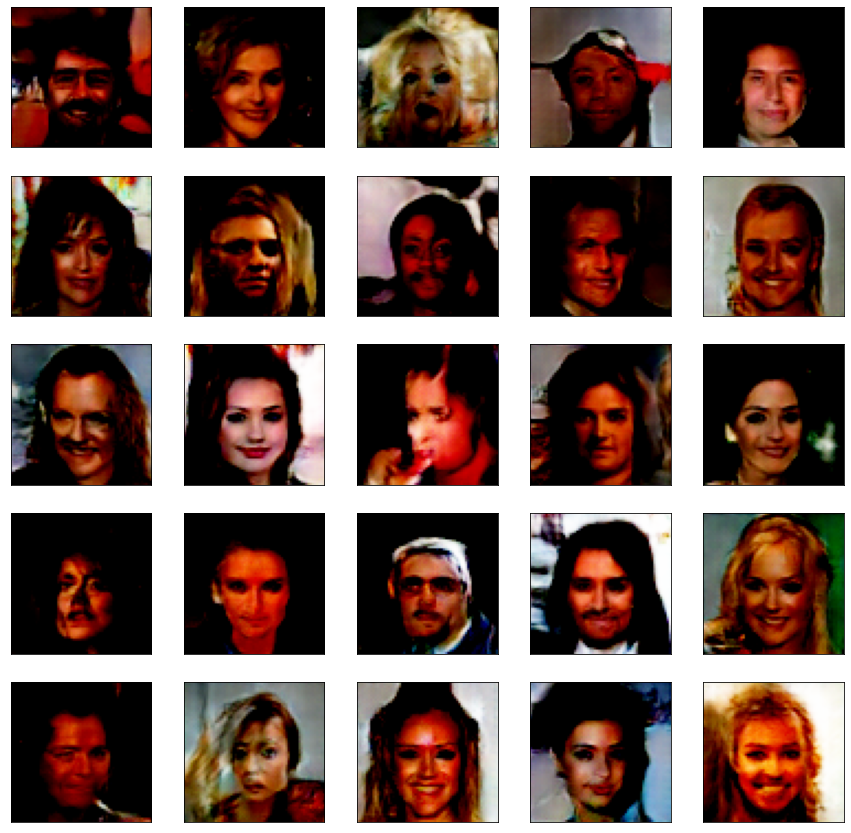

In [13]:
plt.figure(figsize=(15, 15))
plt.rcParams['axes.titlesize'] = 20
plt.axis('off')

for i in range(num ** 2):
    plt.subplot(num, num, i+1)
    fake_image = fake_images[i, :, :, :].permute(1, 2, 0)
    img = plt.imshow(fake_image); img.axes.get_xaxis().set_visible(False); img.axes.get_yaxis().set_visible(False)